# Assignment 1 : Covid -19 



API Endpoint : https://covid19-api.weedmark.systems/api/v1/stats

## Introduction to Covid-19 
                ไวรัสโคโรนาสายพันธุ์ใหม่ 2019 คือ ไวรัสในกลุ่มโคโรนาที่เพิ่งมีการค้นพบใหม่ (ไม่เคยมีการพบเชื้อนี้ในคนมาก่อน) โดยพบครั้งแรกที่เมืองอู่ฮั่น 
            สาธารณรัฐประชาชนจีน ในช่วงปลายปี 2019
    
 #### อาการ
             อาการทั่วไป ได้แก่ อาการระบบทางเดินหายใจ มีไข้ ไอ หายใจถี่ หายใจลำบาก ในกรณีที่อาการรุนแรงมาก อาจทำให้เกิดภาวะแทรกซ้อน เช่น ปอดบวม
         ปอดอักเสบ ไตวาย หรืออาจเสียชีวิต
 #### วิธีป้องกัน
         1. หลีกเลี่ยงการใกล้ชิดกับผู้ป่วยที่มีอาการไอ จาม น้ำมูกไหล เหนื่อยหอบ เจ็บคอ 
         2. หลีกเลี่ยงการเดินทางไปในพื้นที่เสี่ยง 
         3. สวมหน้ากากอนามัยทุกครั้งเมื่ออยู่ในที่สาธารณะ 
         4. ระมัดระวังการสัมผัสพื้นผิวที่ไม่สะอาด และอาจมีเชื้อโรคเกาะอยู่ รวมถึงสิ่งที่มีคนจับบ่อยครั้ง


#### Import Packages ที่ต้องใช้

In [1]:
import urllib
import requests
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import json
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import requests
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
url = 'https://covid19-api.weedmark.systems/api/v1/stats'
r = requests.get(url)
j = r.json()


## 1. Data understanding & Data preparation
#### นำข้อมูลเข้า Data Frame 

In [3]:
df = pd.DataFrame(j)
df = pd.DataFrame(j["data"]["covid19Stats"])
df

,city,province,country,lastUpdate,keyId,confirmed,deaths,recovered
0,None,None,Afghanistan,2020-10-04T04:23:44+00:00,Afghanistan,39297,1462,32842.0
1,None,None,Albania,2020-10-04T04:23:44+00:00,Albania,14117,392,8536.0
2,None,None,Algeria,2020-10-04T04:23:44+00:00,Algeria,51995,1756,36482.0
3,None,None,Andorra,2020-10-04T04:23:44+00:00,Andorra,2110,53,1540.0
4,None,None,Angola,2020-10-04T04:23:44+00:00,Angola,5370,193,2436.0
...,...,...,...,...,...,...,...,...
3950,None,None,West Bank and Gaza,2020-10-04T04:23:44+00:00,West Bank and Gaza,41078,329,33442.0
3951,None,None,Western Sahara,2020-10-04T04:23:44+00:00,Western Sahara,10,1,8.0
3952,None,None,Yemen,2020-10-04T04:23:44+00:00,Yemen,2041,589,1320.0
3953,None,None,Zambia,2020-10-04T04:23:44+00:00,Zambia,14974,333,14094.0


#### saveข้อมูลเก็บเป็น .csv เพื่อเก็บเป็น staging area

In [4]:

df.to_csv("data/covid-19_api.csv",index=False)

In [37]:
#เปิดข้อมูลจากไฟล์ covid-19_api
df = pd.read_csv("data/covid-19_api.csv")
df

,city,province,country,lastUpdate,keyId,confirmed,deaths,recovered
0,NaN,NaN,Afghanistan,2020-10-04T04:23:44+00:00,Afghanistan,39297,1462,32842.0
1,NaN,NaN,Albania,2020-10-04T04:23:44+00:00,Albania,14117,392,8536.0
2,NaN,NaN,Algeria,2020-10-04T04:23:44+00:00,Algeria,51995,1756,36482.0
3,NaN,NaN,Andorra,2020-10-04T04:23:44+00:00,Andorra,2110,53,1540.0
4,NaN,NaN,Angola,2020-10-04T04:23:44+00:00,Angola,5370,193,2436.0
...,...,...,...,...,...,...,...,...
3950,NaN,NaN,West Bank and Gaza,2020-10-04T04:23:44+00:00,West Bank and Gaza,41078,329,33442.0
3951,NaN,NaN,Western Sahara,2020-10-04T04:23:44+00:00,Western Sahara,10,1,8.0
3952,NaN,NaN,Yemen,2020-10-04T04:23:44+00:00,Yemen,2041,589,1320.0
3953,NaN,NaN,Zambia,2020-10-04T04:23:44+00:00,Zambia,14974,333,14094.0


#### หลังจากทำการโหลดข้อมูลมาแล้ว ใช้.info() เพื่อดูว่าข้อมูลมีกี่แถว, มี Missing Values เท่าไหร่, แต่ละcolumnเป็น data type อะไร

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3955 entries, 0 to 3954
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        3264 non-null   object 
 1   province    3787 non-null   object 
 2   country     3955 non-null   object 
 3   lastUpdate  3955 non-null   object 
 4   keyId       3955 non-null   object 
 5   confirmed   3955 non-null   int64  
 6   deaths      3955 non-null   int64  
 7   recovered   614 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 247.3+ KB


In [7]:
#ตรวจสอบการซ้ำของข้อมูล
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3950    False
3951    False
3952    False
3953    False
3954    False
Length: 3955, dtype: bool

#### ทำการหาว่าcolumn ไหนมี Missing Values บ้างและมีค่าว่างเท่าไหร่
    พบว่า column city มีค่าว่าง 691 
    พบว่า column province มีค่าว่าง 168
    พบว่า column recovered มีค่าว่าง 3341

In [8]:
#เช็ค Missing Values
df.isnull().sum()

city           691
province       168
country          0
lastUpdate       0
keyId            0
confirmed        0
deaths           0
recovered     3341
dtype: int64

In [9]:
#เช็คประเภทของข้อมูล เพื่อให้ทราบว่าเป็น data type ประเภทไหน
df.dtypes

city           object
province       object
country        object
lastUpdate     object
keyId          object
confirmed       int64
deaths          int64
recovered     float64
dtype: object

    เช็คcolumn country , province เพื่อดูว่าในแต่ละประเทศและในแต่ละเมืองมีกี่เรคคอร์ด

In [10]:
df['country'].value_counts()

US             3270
Russia           83
Japan            49
India            37
Colombia         34
               ... 
Brunei            1
Belize            1
New Zealand       1
Portugal          1
Iceland           1
Name: country, Length: 188, dtype: int64

In [11]:
df['province'].value_counts()

Texas                    255
Georgia                  161
Virginia                 134
Kentucky                 121
Missouri                 117
                        ... 
Friuli Venezia Giulia      1
Bahia                      1
Lima                       1
Risaralda                  1
Leningrad Oblast           1
Name: province, Length: 562, dtype: int64

#### เช็คค่าที่ไม่สอดคล้องกัน
ไม่พบค่าที่ไม่สอดคล้องกัน

In [12]:
for i in df :
  print(df[i].value_counts(),'\n')

Unassigned        51
Washington        30
Jefferson         26
Franklin          25
Jackson           24
                  ..
Gonzales           1
Grafton            1
Southeast Utah     1
Brule              1
Fredericksburg     1
Name: city, Length: 1919, dtype: int64 

Texas                    255
Georgia                  161
Virginia                 134
Kentucky                 121
Missouri                 117
                        ... 
Friuli Venezia Giulia      1
Bahia                      1
Lima                       1
Risaralda                  1
Leningrad Oblast           1
Name: province, Length: 562, dtype: int64 

US             3270
Russia           83
Japan            49
India            37
Colombia         34
               ... 
Brunei            1
Belize            1
New Zealand       1
Portugal          1
Iceland           1
Name: country, Length: 188, dtype: int64 

2020-10-04T04:23:44+00:00    3952
2020-08-04T02:27:56+00:00       2
2020-08-07T22:34:20+00:00       1


#### เติมค่า Missing Values
    เติมค่าว่างใน column "city" = Unknow 
    เติมค่าว่างใน column "province" = Unknow 
    เติมค่าว่างใน column "recovered" = 0
    


In [52]:
#เติมค่าที่หายไปของคอลัมภ์ city ให้เป็น Unknown
df["city"]= df["city"].fillna('Unknown')
df

,city,province,country,lastUpdate,keyId,confirmed,deaths,recovered
0,Unknown,NaN,Afghanistan,2020-10-04T04:23:44+00:00,Afghanistan,39297,1462,32842.0
1,Unknown,NaN,Albania,2020-10-04T04:23:44+00:00,Albania,14117,392,8536.0
2,Unknown,NaN,Algeria,2020-10-04T04:23:44+00:00,Algeria,51995,1756,36482.0
3,Unknown,NaN,Andorra,2020-10-04T04:23:44+00:00,Andorra,2110,53,1540.0
4,Unknown,NaN,Angola,2020-10-04T04:23:44+00:00,Angola,5370,193,2436.0
...,...,...,...,...,...,...,...,...
3950,Unknown,NaN,West Bank and Gaza,2020-10-04T04:23:44+00:00,West Bank and Gaza,41078,329,33442.0
3951,Unknown,NaN,Western Sahara,2020-10-04T04:23:44+00:00,Western Sahara,10,1,8.0
3952,Unknown,NaN,Yemen,2020-10-04T04:23:44+00:00,Yemen,2041,589,1320.0
3953,Unknown,NaN,Zambia,2020-10-04T04:23:44+00:00,Zambia,14974,333,14094.0


In [16]:
#เติมค่าที่หายไปของคอลัมภ์ province ให้เป็น Unknown
df["province"]= df["province"].fillna('Unknown')
df

,city,province,country,lastUpdate,keyId,confirmed,deaths,recovered
0,Unknown,Unknown,Afghanistan,2020-10-04T04:23:44+00:00,Afghanistan,39297,1462,32842.0
1,Unknown,Unknown,Albania,2020-10-04T04:23:44+00:00,Albania,14117,392,8536.0
2,Unknown,Unknown,Algeria,2020-10-04T04:23:44+00:00,Algeria,51995,1756,36482.0
3,Unknown,Unknown,Andorra,2020-10-04T04:23:44+00:00,Andorra,2110,53,1540.0
4,Unknown,Unknown,Angola,2020-10-04T04:23:44+00:00,Angola,5370,193,2436.0
...,...,...,...,...,...,...,...,...
3950,Unknown,Unknown,West Bank and Gaza,2020-10-04T04:23:44+00:00,West Bank and Gaza,41078,329,33442.0
3951,Unknown,Unknown,Western Sahara,2020-10-04T04:23:44+00:00,Western Sahara,10,1,8.0
3952,Unknown,Unknown,Yemen,2020-10-04T04:23:44+00:00,Yemen,2041,589,1320.0
3953,Unknown,Unknown,Zambia,2020-10-04T04:23:44+00:00,Zambia,14974,333,14094.0


In [14]:
#เติมค่าที่หายไปของcloumn recovered ด้วยค่า 0
df["recovered"]= df["recovered"].fillna(0)


In [17]:
#ทำการเช็คค่าว่างอีกหนึ่งครั้งเพื่อดูว่าค่าว่างได้หายไปแล้ว
df.isnull().sum()

city          0
province      0
country       0
lastUpdate    0
keyId         0
confirmed     0
deaths        0
recovered     0
dtype: int64

#### เพิ่ม column Active ประกอบการวิเคราะห์ข้อมูล
    เพิ่ม column "Active"เนื่องจากต้องการทราบว่าจากยอดผู้ติดเชื้อทั้งหมดยังมีผู้ที่มีชีวิตและยังไม่หายจาก covid-19 กี่คน
    โดยใช้ df['Active'] = df['confirmed'] - df['recovered'] -df["deaths"] 

In [18]:
#เพิ่ม cloumn active เพื่อให้รู้ว่ามีคนที่ยังมีชีวิตอยู่กี่คน
df['Active'] = df['confirmed'] - df['recovered'] -df["deaths"] 
df.head()

,city,province,country,lastUpdate,keyId,confirmed,deaths,recovered,Active
0,Unknown,Unknown,Afghanistan,2020-10-04T04:23:44+00:00,Afghanistan,39297,1462,32842.0,4993.0
1,Unknown,Unknown,Albania,2020-10-04T04:23:44+00:00,Albania,14117,392,8536.0,5189.0
2,Unknown,Unknown,Algeria,2020-10-04T04:23:44+00:00,Algeria,51995,1756,36482.0,13757.0
3,Unknown,Unknown,Andorra,2020-10-04T04:23:44+00:00,Andorra,2110,53,1540.0,517.0
4,Unknown,Unknown,Angola,2020-10-04T04:23:44+00:00,Angola,5370,193,2436.0,2741.0


## 2. Analyze & Visualization
    เมื่อทำการ cleaned data มาเป็นที่เรียบร้อยก็นำข้อมูลที่ได้มาทำการวิเคราะห์และทำvisualizationเพื่อให้เข้าใจข้อมูลได้ง่ายมายิ่งขึ้น


    เนื่องจาก API Endpoints ที่ใช้นั้นเป็นข้อมูล covid-19 ที่เก็บทั่วโลก, แต่ละเมือง , แต่ละจังหวัด โดยมียอดผู้ติดเชื้อ["confirmed"] ,ยอดผู้เสียชีวิต["deaths"],
    ยอดที่ได้รับการรักษาจนหาย["recovered"]
        1. ต้องการทราบยอดผู้ติดเชื้อ, ยอดผู้เสียชีวิต , ยอดผู้ที่ได้รับการรักษาจนหาย ,ยอด Active จึงได้นำเสนอในรูปแบบตาราง ซึ่งเป็นข้อมูลแบบเรียลไทม์

In [19]:
#group by ข้อมูลที่ถูกเก็บจากล่าสุดเพื่อจะได้รู้จำนวนของยอดผู้ติดเชื้อทั่วโลก
Data = df.groupby(["lastUpdate"])[["confirmed","deaths","recovered","Active"]].sum().reset_index()
Data

,lastUpdate,confirmed,deaths,recovered,Active
0,2020-08-04T02:27:56+00:00,152,3,0.0,149.0
1,2020-08-07T22:34:20+00:00,0,0,0.0,0.0
2,2020-10-04T04:23:44+00:00,34902348,1033172,24287629.0,9581547.0


    เมื่อทำการ groupby แล้วพบว่าข้อมูลยอดผู้ติดเชื้อทั่วโลกอยู่ที่ 34,279,545 คน และยอดผู้เสียชีวิตทั่วโลกอยู่ที่ 1,022,702 คน

In [54]:
#ทำตารางขึ้นมาให้รู้จำนวน คอนเฟิร์ม(ว่าเป็น covid), ตาย, หายแล้ว, ที่ยังมีชีวิตอยู่

labels = ["lastUpdate","confirmed","deaths","recovered","Active"]
fig = go.Figure(data=[go.Table(header=dict(values=labels),
                               
                            
                     
                 cells=dict(values=Data.loc[2,["lastUpdate","confirmed","deaths","recovered","Active"]],
                             line_color='white',
                            font = dict(color = 'black', size = 12)))
                     ])
fig.update_layout(
    title='Covid-19 Last Update : '+ str(Data["confirmed"][2]),
)
fig.show()




    เมื่อทราบจำนวนผู้ติดเชื้อทั้งโลกแล้ว ก็ทำการมองข้อมูลให้แคบลงไปอีกด้วยการมองจำนวนผู้ติดเชื้อในแต่ละประเทศ
       2. ต้องการทราบยอดผู้ติดเชื้อ ยอดที่ได้รับการรักษาจนหาย ยอดผู้เสียชีวิต ของแต่ละประเทศทั่วโลก
   โดยทำการ groupby แล้วเรียงข้อมูลจากมากไปน้อยด้วยยอดผู้เสียชีวิต

In [21]:
#ยอด confirmed , recovered , deaths จากแต่ะประเทศทั่วโลก
Data_country = df.groupby(["country"])["confirmed","recovered","deaths"].sum().reset_index().sort_values("deaths",ascending=False).reset_index(drop=True)
Data_country 

,country,confirmed,recovered,deaths
0,US,7382194,2897322.0,209382
1,Brazil,4906833,4361108.0,145987
2,India,6549373,5509966.0,101782
3,Mexico,757953,637993.0,78880
4,United Kingdom,482654,2396.0,42407
...,...,...,...,...
183,Seychelles,146,143.0,0
184,Cambodia,278,275.0,0
185,Eritrea,398,358.0,0
186,Laos,23,22.0,0


    เมื่อได้รับ output ออกมาพบว่า ประเทศที่ยอดผู้เสียชีวิตมากที่สุดคือ US , Brazil และยอดผู้เสียชีวิตของประเทศไทยอยู่ที่ 59 คน
    จึงได้ทำการนำเสนอในรูปแบบตาราง :
    
 ### Deaths by Contries
    

In [57]:
#จำนวนผู้เสียชีวิตในแต่ละประเทศ พบว่าประเทศไทยอยู่อันดับที่ 59 และ ประเทศที่มีอันดับผู้เสียชีวิตมากที่สุดคือ US และ India
headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['ประเทศ','จำนวนผู้เสียชีวิต'],
    line_color='white',
    fill_color='#2d4059',
    align=['center','center'],
      
    font=dict(color='white', size=16)
  ),
  cells=dict(
    values=[
      Data_country['country'],
      Data_country['deaths'],
      ],
    line_color='white',
    fill_color='#decdc3',
    align = ['center', 'center'],
    font = dict(color = 'darkslategray', size = 12)
    ))
])
fig.update_layout(
    title='Deaths by Contries',
)
fig.show()

### Confirmed by Contries

In [67]:
#สร้าง bar chart (horizontal) เพื่อเปรียบเทียบจำนวน confirmed ในแต่ละประเทศ
fig = go.Figure(go.Bar(
            x=Data_country['confirmed'].head(30),
            y=Data_country['country'].head(30),
            marker_color = "#ea5455",
            orientation='h'))
fig.update_layout(
    title='Confirmed by Contries',
     xaxis_title="Confirmed ",
    yaxis_title="Countries",
    paper_bgcolor="#f8efd4",
    font=dict(
        family="Times New Roman",
        size=15,
        color="black"
    )
)


fig.show()

    3. ต้องการทราบยอดผู้ติดเชื้อในแต่ละประเทศ
    โดยนำเสนอในรูปแบบ horizontal bar chart พบว่า ยอดผู้ติดเชื้อ 3 อันดับแรกคือ 1) อเมริกา 2)อินเดีย  3)บราซิล

### Recovered by Contries

In [66]:
#สร้าง bar chart (horizontal) เพื่อเปรียบเทียบจำนวน recoverd ในแต่ละประเทศ
fig = go.Figure(go.Bar(
            x=Data_country['recovered'].head(30),
            y=Data_country['country'].head(30),
            marker_color = "#07689f",
            orientation='h'))
fig.update_layout(
    title='Recovered by Contries',
     xaxis_title="Recovered",
    yaxis_title="Countries",
    paper_bgcolor="#f8efd4",
    font=dict(
        family="Times New Roman",
        size=15,
        color="black"
    )
)
fig.show()

    4. ต้องการทราบยอดผู้ที่ได้รับการรักษาจนหายในแต่ละประเทศ
    โดยนำเสนอในรูปแบบ horizontal bar chart พบว่า ยอดผู้ที่ได้รับการรักษาจนหาย 3 อันดับแรกคือ 1) อินเดีย  2)บราซิล  3)อเมริกา

### Covid-19 in India
        จากการสำรวจยอด confirmed , recovered , deaths แล้วนั้น จะทำการวิเคราะห์ย่อยลงไปในประเทศอินเดีย ที่มียอดผู้ติดเชื้อและยอดผู้เสียชีวิตเป็นอันดับที่ 3 
    สาเหตุที่สนใจเพราะว่า เนื่องจากอินเดียเป็นประเทศที่มีความแออัดและมีประชากรที่เยอะ รวมถึงมีการอุปโภค-บริโภคบางอย่างที่ยังไม่ถูกสุขลักษณะอนามัย
    ด้วยจำนวนที่ประชากรที่เยอะในแต่ละพื้นที่ที่มีความแออัด อาจส่งผลต่อ การแพร่ระบาดของ covid-19
        
        
        โดยมีข้อมูลที่อ้างอิงจำนวนประชากรในแต่ละเมืองของอินเดีย
        Link : https://en.wikipedia.org/wiki/List_of_cities_in_India_by_population
        
    

In [25]:
#เลือกประเทศอินเดีย
Data_ID = df[(df['country'] == 'India') ].reset_index(drop=True)
Data_ID


,city,province,country,lastUpdate,keyId,confirmed,deaths,recovered,Active
0,Unknown,Andaman and Nicobar Islands,India,2020-10-04T04:23:44+00:00,"Andaman and Nicobar Islands, India",3868,53,3642.0,173.0
1,Unknown,Andhra Pradesh,India,2020-10-04T04:23:44+00:00,"Andhra Pradesh, India",713014,5941,651791.0,55282.0
2,Unknown,Arunachal Pradesh,India,2020-10-04T04:23:44+00:00,"Arunachal Pradesh, India",10421,18,7388.0,3015.0
3,Unknown,Assam,India,2020-10-04T04:23:44+00:00,"Assam, India",185444,735,150776.0,33933.0
4,Unknown,Bihar,India,2020-10-04T04:23:44+00:00,"Bihar, India",186441,912,173932.0,11597.0
5,Unknown,Chandigarh,India,2020-10-04T04:23:44+00:00,"Chandigarh, India",12360,172,10396.0,1792.0
6,Unknown,Chhattisgarh,India,2020-10-04T04:23:44+00:00,"Chhattisgarh, India",121400,1031,91077.0,29292.0
7,Unknown,Dadra and Nagar Haveli and Daman and Diu,India,2020-10-04T04:23:44+00:00,"Dadra and Nagar Haveli and Daman and Diu, India",3070,2,2967.0,101.0
8,Unknown,Delhi,India,2020-10-04T04:23:44+00:00,"Delhi, India",287930,5472,257224.0,25234.0
9,Unknown,Goa,India,2020-10-04T04:23:44+00:00,"Goa, India",34900,450,29527.0,4923.0


In [27]:
#ทำการจัดกลุ่มแต่ละรัฐโดยใช้ยอดผู้ติดเชื้อเรียงจากมากไปน้อย
Data_id_state= Data_ID.groupby(["province"])["confirmed","recovered","deaths"].sum().reset_index().sort_values("confirmed",ascending=False).reset_index(drop=True)
Data_id_state

,province,confirmed,recovered,deaths
0,Maharashtra,1430861,1134555.0,37758
1,Andhra Pradesh,713014,651791.0,5941
2,Karnataka,630516,508495.0,9219
3,Tamil Nadu,614507,558534.0,9718
4,Uttar Pradesh,410626,356826.0,5977
5,Delhi,287930,257224.0,5472
6,West Bengal,266974,234712.0,5132
7,Odisha,229387,198194.0,892
8,Kerala,221333,139620.0,813
9,Telangana,199276,170212.0,1163


In [69]:
#สร้าง Pie Chart เพื่อให้เห็นสัดส่วนผู้ติดเชื้อในแต่ละเมืองของอินเดีย
fig = px.pie(Data_id_state,values=Data_id_state['confirmed'], names=Data_id_state['province'],
             title='Confirmed Covid-19 cases in India by Contries',
            hole=0.5)
fig.update_traces(textposition='inside', textinfo='value+label')
fig.show()

## สรุปผล
เมื่อนำข้อมูลที่ทำการจัดกลุ่มแบ่งออกเป็นรัฐแล้วนำมา plot เป็น donut chart พบว่า รัฐที่มียอดผู้ติดเชื้อสูงสุดคือ 
    1. Maharashtra ซึ่งมียอดผู้ติดเชื้อ 1,400,922 คน โดยพบว่า รัฐมหาราษฏระมีประชากร 112,374,333 คน ซึ่งเป็นเขตประการปกครองระดับที่1ที่มีประชากรมากที่สุดเป็นอันดับ2ของโลก
    2. Andhra Pradesh (อนาธรประเทศ) มียอดผู้ติดเชื้อ 700,235 โดยมีประชากรที่อาศัยอยู่ในอนาธรประเทศทั้งหมด 49,386,799 คน
    3. karnataka(คาร์นาตากา) มียอดผู้ติดเชื้อ 611,837 โดยมีประชากรที่อาศัยอยู่ในคาร์นาตากา 61,130,704 คน
    4. Tamil Nadu(ทมิฬนาดู) มียอดผู้ติดเชื้อ 603,290 โดยมีประชากรที่อาศัยอยู่ในทมิฬนาดู 72,147,030 คน
    5. Uttar Pradesh(อุตตรประเทศ ) มียอดผู้ติดเชื้อ 399,082 โดยมีประชากรที่อาศัยอยู่ในอุตตรประเทศ  199,812,341 คน

เนื่องจากแต่ละเมืองมีประชากรอาศัยอยู่จำนวนมากซึ่งอยู่ในพื้นที่ที่จำกัดอาจส่งผลต่อการแพร่ระบาดของ covid-19 ได้ง่าย เนื่องจาก social distancingจะต้องมีพื้นที่ที่เยอะพอสมควรคือห่างกัน 2เมตร

## Covid-19 in Brazil
            บราซิลเป็นประเทศที่มีค่าครองชีพที่สูงซึ่งสูงมากกว่าประเทศไทย 2-3 เท่า และชาวบ้านที่ยากจนไม่สามารถเข้าถึงสาธรณูปโภค-สาธารณะสุขได้ แต่ผู้ว่าการแต่ละรัฐได้มีมาตรการตรวจเชื้อ covid-19 จึงทำให้ตัวเลขของผู้ติดเชื้อมากขึ้น แต่เนื่องจากชาวบ้านที่ยากจนก็ยังไม่สามารถเข้าถึงได้จึงส่งผลต่อตัวเลขผู้เสียชีวิตเช่นกัน แต่ในช่วง 10 สัปดาห์ที่ผ่านมายอดผู้ติดเชื้อสะสมลดลงจึงมีมาตรการให้กลับมาเปิดการเรียนการสอนได้ 

In [29]:
#ยอดผู้ติดเชื้อในแต่ละเมืองของบราซิล
Data_BZ = df[(df['country'] == 'Brazil') ].reset_index(drop=True)
Data_BZ

,city,province,country,lastUpdate,keyId,confirmed,deaths,recovered,Active
0,Unknown,Acre,Brazil,2020-10-04T04:23:44+00:00,"Acre, Brazil",28662,667,26885.0,1110.0
1,Unknown,Alagoas,Brazil,2020-10-04T04:23:44+00:00,"Alagoas, Brazil",87928,2091,84709.0,1128.0
2,Unknown,Amapa,Brazil,2020-10-04T04:23:44+00:00,"Amapa, Brazil",48602,715,36489.0,11398.0
3,Unknown,Amazonas,Brazil,2020-10-04T04:23:44+00:00,"Amazonas, Brazil",142137,4169,120012.0,17956.0
4,Unknown,Bahia,Brazil,2020-10-04T04:23:44+00:00,"Bahia, Brazil",314711,6890,301080.0,6741.0
5,Unknown,Ceara,Brazil,2020-10-04T04:23:44+00:00,"Ceara, Brazil",242669,9050,215635.0,17984.0
6,Unknown,Distrito Federal,Brazil,2020-10-04T04:23:44+00:00,"Distrito Federal, Brazil",194783,3309,184460.0,7014.0
7,Unknown,Espirito Santo,Brazil,2020-10-04T04:23:44+00:00,"Espirito Santo, Brazil",133744,3572,123083.0,7089.0
8,Unknown,Goias,Brazil,2020-10-04T04:23:44+00:00,"Goias, Brazil",215938,4832,204925.0,6181.0
9,Unknown,Maranhao,Brazil,2020-10-04T04:23:44+00:00,"Maranhao, Brazil",175218,3787,165886.0,5545.0


In [30]:
#ทำการจัดกลุ่มแต่ละเมืองโดยใช้ยอดผู้ติดเชื้อเรียงจากมากไปน้อย
Data_BZ_state= Data_BZ.groupby(["province"])["confirmed","recovered","deaths"].sum().reset_index().sort_values("confirmed",ascending=False).reset_index(drop=True)
Data_BZ_state

,province,confirmed,recovered,deaths
0,Sao Paulo,1003429,865135.0,36136
1,Bahia,314711,301080.0,6890
2,Minas Gerais,305527,270475.0,7569
3,Rio de Janeiro,271575,247541.0,18749
4,Ceara,242669,215635.0,9050
5,Para,233802,217904.0,6593
6,Santa Catarina,218633,208547.0,2842
7,Goias,215938,204925.0,4832
8,Rio Grande do Sul,202587,187652.0,4898
9,Distrito Federal,194783,184460.0,3309


In [72]:
#สร้างกราฟแสดงยอดผู้ติดเชื้อในแต่ละเมืองของบราซิล
#ซึ่งทำการโฟกัส10อันดับแรกด้วยการใส่สี 

fig = go.Figure(data=[go.Bar(
            x=Data_BZ_state['province'], y=Data_BZ_state['confirmed'],
            text=['confirmed'],
            textposition='auto',
            marker_color=['#7d0633','#821752','#0f3057','#00587a','#008891','#41aea9','#a6f6f1','#ccf6c8','#fafcc2','#f6d6ad','#f9c0c0'],

        )])
fig.update_layout(
    title='Confirmed Covid-19 cases in Brazil by Contries',
    xaxis_title="Contries",
    yaxis_title="Confirmed(case)",
    template='plotly_white'
)
fig.show()


## สรุปผล
                จาก bar chart พบว่า เมืองที่มียอดผู้ติดเชื้อสะสมมากที่สุดคือ 
        1. Sao Paulo ยอดผู้ติดเชื้อสะสม 991,725 คน 
        2. Bahia ยอดผู้ติดเชื้อสะสม 298,607 คน 
        3. Minas Gerais ยอดผู้ติดเชื้อสะสม 298,607 คน 
        4. Rio de Janeiro ยอดผู้ติดเชื้อสะสม 266,235 คน 
        5. Ceara ยอดผู้ติดเชื้อสะสม 241,684 คน 
          
          
              โดยวิสัยทัศน์ของประธาณาธิบดีของประเทศบราซิลนั้นไม่ได้ให้ความสำคัญกับ covid-19 แต่ให้ความสำคัญกับเศรษฐกิจที่กำลังชะลอตัวซึ่งเป็นผลกระทบจาก 
          covid-19 มากกว่าจึงทำให้ไม่ได้สนับสนุนการตรวจเชื้อและไม่ได้ปฏิบัติตามคำแนะนำขององค์กรอนามัยโลก(WHO) จึงส่งผลต่อจำนวนผู้ติดเชื้อ covid-19 
          ในบราซิล
    

## Covid-19 in Thailand
        เนื่องจากประเทศไทยไม่ได้มีมาตรการปูพรมตรวจเชื้อcovid-19ย่อมส่งผลต่อตัวเลขผู้ติดเชื้อสะสมที่ดูไม่มากนัก แต่ประเทศไทยยังคุมเข้มเรื่องมาตรการล็อคดาวน์และมีการประกาศใช้ พรบ.ฉุกเฉิน 

In [32]:
#สัดส่วนผู้ติดเชื้อ-ผู้ที่ได้รับการรักษาแล้วหาย -ผู้เสียชีวิต
Data_TH = df[(df['country'] == 'Thailand') ].reset_index(drop=True)
Data_TH

,city,province,country,lastUpdate,keyId,confirmed,deaths,recovered,Active
0,Unknown,Unknown,Thailand,2020-10-04T04:23:44+00:00,Thailand,3585,59,3388.0,138.0


In [33]:
#ดึงข้อมูลที่ต้องการคือ confirmed , deaths , recovered , Active มาเพื่อแสดงตัวเลข 
Data_TH = Data_TH[Data_TH['lastUpdate'] == max(Data_TH['lastUpdate'])].reset_index()
Data_TH2= Data_TH.groupby(["city"])["confirmed","deaths","recovered","Active"].sum().reset_index().reset_index(drop=True)
Data_TH2

,city,confirmed,deaths,recovered,Active
0,Unknown,3585,59,3388.0,138.0


In [73]:
#Pie chart แสดงจำนวนผู้เสียชีวิต , ผู้ติดเชื้อ , recovered ในประเทศไทย
labels = ["Active ","recovered","deaths"]
values = Data_TH2.loc[0, ["Active","recovered","deaths"]]
df = px.data.tips()
fig = px.pie(Data_TH2, values=values, names=labels, color_discrete_sequence=['#679b9b','#6a2c70','#821752'], hole=0.5)
fig.update_layout(
    title='Covid-19 cases in Thailand : '+str(Data_TH2["confirmed"][0]),
)
fig.show()

## สรุปผล
             ประเทศไทยมียอดผู้ติดเชื้อ(confirmed) 3,575 คน, รักษาแล้วหาย(recovered) 3,384 คน , เสียชีวิต 59 คน 
         เมื่อทำการวิเคราะห์ยอดผู้ติดเชื้อสะสมและยอดrecoverd พบว่าประเทศไทยมีศักยภาพในการรักษาได้ดี และมีการคุมเข้มในช่วงแรกของโรคที่กำลังระบาด คือ 
         ให้งดการจัดกิจกรรมรวมคนจำนวนมากที่มีความเสี่ยงสูงต่อการแพร่ระบาดของโรค เช่น จัดคอนเสิร์ต การจัดงานแสดงสินค้าต่าง ๆ
        

## Covid-19 in Japan
           ญี่ปุ่นติดอันดับระบบสุขภาพที่ดีที่สุดในโลก(ระบบสาธารณสุข) เป็นอันดับที่3 เมื่อปี2019
           เมื่อวันที่ 2 กันยายน 2563 ที่ผ่านมา กระทรวงสาธรณะสุขญี่ปุ่นประกาศฉีดวัคซีนต้านcovid-19ให้กับพลเมืองชาวญี่ปุ่นทุกคน ฟรี โดยมีเป้าหมายเพื่อลดยอดผู้ติดเชื้อและการเสียชีวิตจากโควิด       
           ญี่ปุ่นไม่ได้มีมาตรการล็อคดาวน์เพียงแต่รัฐบาลขอความร่วมมืออยู่บ้านโดยสมัครใจ
       
       
       
        อ้างอิง : https://www.thansettakij.com/content/normal_news/430180
        อ้างอิง : https://www.posttoday.com/world/634526
    

In [53]:
Data_JP = df[(df['country'] == 'Japan') ].reset_index(drop=True)
Data_JP

,city,province,country,lastUpdate,keyId,confirmed,deaths,recovered
0,Unknown,Aichi,Japan,2020-10-04T04:23:44+00:00,"Aichi, Japan",5426,83,4924.0
1,Unknown,Akita,Japan,2020-10-04T04:23:44+00:00,"Akita, Japan",53,0,53.0
2,Unknown,Aomori,Japan,2020-10-04T04:23:44+00:00,"Aomori, Japan",37,1,34.0
3,Unknown,Chiba,Japan,2020-10-04T04:23:44+00:00,"Chiba, Japan",4010,72,3580.0
4,Unknown,Ehime,Japan,2020-10-04T04:23:44+00:00,"Ehime, Japan",114,6,108.0
5,Unknown,Fukui,Japan,2020-10-04T04:23:44+00:00,"Fukui, Japan",244,11,230.0
6,Unknown,Fukuoka,Japan,2020-10-04T04:23:44+00:00,"Fukuoka, Japan",5059,99,4855.0
7,Unknown,Fukushima,Japan,2020-10-04T04:23:44+00:00,"Fukushima, Japan",263,4,214.0
8,Unknown,Gifu,Japan,2020-10-04T04:23:44+00:00,"Gifu, Japan",629,10,588.0
9,Unknown,Gunma,Japan,2020-10-04T04:23:44+00:00,"Gunma, Japan",725,19,644.0


In [40]:
#แสดงยอดconfirmedในแต่ละจังหวัดของประเทศญี่ปุ่น
D_JP = Data_JP.groupby('province')['confirmed'].sum().sort_values(ascending=False).to_frame()
D_JP.style.background_gradient(cmap='cubehelix_r')

,confirmed
province,
Tokyo,26389
Osaka,10770
Kanagawa,7108
Aichi,5426
Fukuoka,5059
Saitama,4776
Chiba,4010
Hyogo,2785
Okinawa,2580


In [41]:
#แสดงยอดrecoveredในแต่ละจังหวัดของประเทศญี่ปุ่น
D_JP = Data_JP.groupby('province')['recovered'].sum().sort_values(ascending=False).to_frame()
D_JP.style.background_gradient(cmap='cubehelix_r')

,recovered
province,
Tokyo,23430.000000
Osaka,9939.000000
Kanagawa,6328.000000
Aichi,4924.000000
Fukuoka,4855.000000
Saitama,4298.000000
Chiba,3580.000000
Hyogo,2551.000000
Okinawa,2270.000000


In [40]:
#แสดงยอดผู้เสียชีวิตในแต่ละจังหวัดของประเทศญี่ปุ่น
D_JP = Data_JP.groupby('province')['deaths'].sum().sort_values(ascending=False).to_frame()
D_JP.style.background_gradient(cmap='cubehelix_r')

,deaths
province,
Tokyo,409
Osaka,215
Kanagawa,144
Hokkaido,107
Saitama,102
Fukuoka,99
Aichi,83
Chiba,72
Hyogo,59


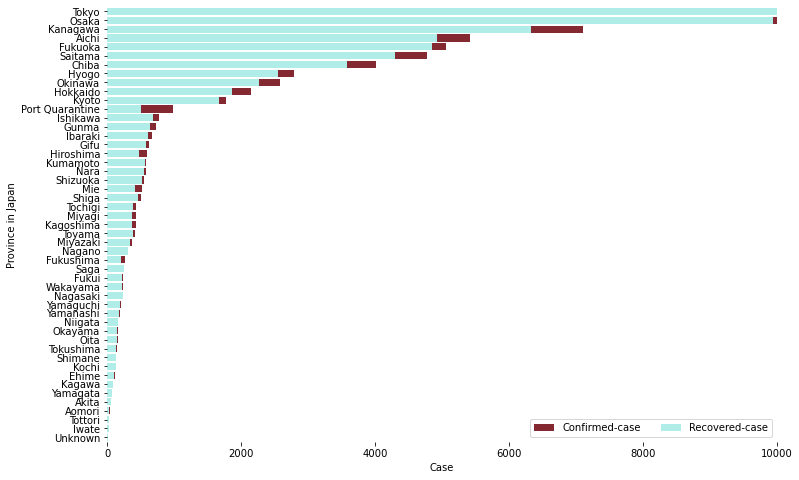

In [74]:
#ทำ stack bar chart เพื่อเปรียบเทียบระหว่างยอดผู้ติดเชื้อ-และได้รับการรักษาจนหายดี
f, ax = plt.subplots(figsize=(12, 8))
dt = Data_JP[['confirmed','deaths','recovered']]
Data_JP.sort_values('confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="confirmed", y="province", data=Data_JP,
            label="Confirmed-case", color="#931a25")

sns.set_color_codes("muted")
sns.barplot(x="recovered", y="province", data=Data_JP,
            label="Recovered-case", color="#a6f6f1")


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 10000), ylabel="Province in Japan",
       xlabel="Case")
sns.despine(left=True, bottom=True)

## สรุปผล
        ช่วงเวลาก่อนหน้าการเกิดการแพร่ระบาดของ covid-19 ในญี่ปุ่น ประชาชนได้มีการสวมหน้ากากอนามัยกันเป็นประจำอยู่แล้ว จึงส่งผลให้เกิดการเคยชินในการใส่หน้ากากอนามัย ถึงแม้จะไม่ได้มีมาตาการการล็อคดาวน์ที่เข้มงวดจากรัฐบาลแต่คนญี่ปุ่นก็ยังปฏิบัติตามอย่างเข้มงวด
        เมื่อดู stack bar charts เปรียบเทียบยอดconfirmedกับ recovered พบว่า ญี่ปุ่นสามารถทำการรักษาผู้ติดเชื้อได้และมียอดผู้เสียชีวิตที่น้อยเมื่อเทียบกับยอดผู้ติดเชื้อในแต่ละเมือง 
        เช่น Tokyo มียอดผู้ติดเชื้อ 25,986 คน สามารถรักษาให้หายได้ 23,147 คน และมียอดผู้เสียชีวิต 409 คน ซึ่งส่งผลมาจากระบบสาธารสุขที่ดี

## Top 20 Covid - 19 by City and Province

In [43]:
#จำนวน confirmed , deaths ในแต่ละprovince
Data_province = df.groupby(["province"])["confirmed"].sum().reset_index().sort_values("confirmed",ascending=False).reset_index(drop=True)
Data_province.head(20)

,province,confirmed
0,Maharashtra,1430861
1,Sao Paulo,1003429
2,California,829521
3,Texas,787425
4,Florida,714591
5,Andhra Pradesh,713014
6,Karnataka,630516
7,Tamil Nadu,614507
8,New York,463360
9,Uttar Pradesh,410626


In [75]:
#นำข้อมูลที่ได้ทำการ group by province มาplot ลงใน treemaps
state = list(Data_province["province"])
cases = list(Data_province["confirmed"])

fig= go.Figure(go.Treemap(
    
    labels =  Data_province["province"].head(20),
    parents=[""]*len(state),
    values =  Data_province["confirmed"].head(20),
    textinfo = "label+value",
    marker_colorscale = "pinkyl"
))
fig.update_layout(
    title_text= 'Top 20 Covid-19 cases by Province',
    title_x=0.5,
    paper_bgcolor='#ade498',
    plot_bgcolor = "#ade498",
    font=dict(
        family="Times New Roman",
        size=18,
        color="black"
    )
    
    )


fig.show()

## สรุปผล
    ยอดผู้ติดเชื้อสูงสุด20อันดับโดยพบว่าทั้ง20อันดับอยู่ในกลุ่มประเทศเหล่านี้คือ อินเดีย อเมริกา อังกฤษ รัสเซีย บราซิล 
        Maharashtra 1,416,513 คน
        Sao Paulo 991,725 คน
        California 826,013 คน
        Texas 782,306 คน
        Florida 711,804 คน
            กล่าวถึง อินเดีย อเมริกา บราซิล มีปัจจัยที่ส่งผลต่อยอดผู้ติดเชื้อคล้ายกันอยู่ 3 ปัจจัย คือ
            1. สาธารณสุขแย่-ไม่คลอบคลุมประชาชนทุกคนเป็นทุนเดิมอยู่แล้ว 
            2. ทั้ง3ประเทศรัฐบาลให้ความสำคัญเรื่องเศรษกิจมากกว่า covid-19  เช่น อินเดียยกเลิกมาตการล้อคดาวน์เพื่อฟื้นฟูเศรษกิจ 
            3. ทั้ง3ประเทศพบปัญหาบุคลากรทางการแพท์ไม่เพียงพอ จึงทำให้ผู้ป่วยล้นโรงพยาบาลและไม่สามารถทำการรักษาได้ 
         โดยอังกฤษ,รัสเซีย,เปรู
             1.เมือง Lima ในประเทศเปรูมียอดผู้ติดเชื้อ 372,659 โดยเผยสาเหตุที่เปรูไม่สามารถทำมามาตรการล็อกดาวน์ได้คือ
                 1.1ในประเทศเปรูหลายครอบครัวยังไม่มีเครื่องใช้ไฟฟ้า ทำให้ไม่สามารถกักตุนอาหารได้เป็นเวลาหลายวัน ซึ่งตลาดถือเป็นแหล่งแพร่เชื้อที่สำคัญ
                 1.2เนื่องจากปัญหาครัวเรือนที่ยากจนของเปรูอยู่กันในพื้นที่แออัดจึงไม่สามารถทำ social distancing ได้
             2. รัสเซียไม่สามารถควบคุมยอดผู้ติดเชื้อได้ แต่ มีระบบการรักษาที่ดี ซึ่งรัสเซียได้มีการทำวัคซีนเกี่ยวกับ covid-19
                 2.1 โดยรัสเซียมียอดผู้ติดเชื้อทั้งสิ้น 1.18 ล้านคน แต่สามารถรักษาให้หายได้ 966,724 คน
             3. ประชาชนในอังกฤษไม่พอใจที่จะใช้มาตรการล็อคดาวน์ประเทศเป็นครั้งที่ 2 จึงเกิดการรวมตัวเพื่อประท้วงทั้งที่รัฐบาลมีมาตาการไม่ให้รวมตัวกันเกิน6คน 
             
        
            
    

In [45]:
#จำนวน confirmed , deaths ในแต่ละcity
Data_city = df.groupby(["city"])["confirmed"].sum().reset_index().sort_values("confirmed",ascending=False).reset_index(drop=True)
Data_city.head(10)

,city,confirmed
0,Los Angeles,273638
1,Miami-Dade,171876
2,Cook,148403
3,Harris,148100
4,Maricopa,142968
5,Orange,112959
6,Dallas,88026
7,Jefferson,84684
8,Clark,77914
9,Broward,77762


In [77]:
#นำข้อมูลที่ได้ทำการ group by city มาplot ลงใน treemaps
city= Data_city["city"]
confirmed_ct = Data_city["confirmed"]

fig= go.Figure(go.Treemap(
    
    labels =  Data_city["city"].head(20),
    parents=[""]*len(state),
    values =  Data_city["confirmed"].head(20),
    textinfo = "label+value",
    marker_colorscale = "purpor"
))
fig.update_layout(
    title_text= 'Top 20 Covid-19 cases by City',
    title_x=0.5,
    paper_bgcolor='#ade498',
    plot_bgcolor = "#ade498",
    font=dict(
        family="Times New Roman",
        size=18,
        color="black"
    )
    
    )

fig.show()

## สรุปผล
    Los Angeles 272,665 คน
    Miami-Dade 171,391 คน
    Cook 147,478 คน
    Harris  147,034 คน 
    Marricopa 142,566 คน
    
               เมื่อพิจารณา Top 20 เมืองที่มียอดผู้ติดเชื้อมากที่สุด พบว่า จาก15ใน20อันดับ เป็นประเทศสหรัฐอเมริกาซึ่งเป็นประเทศที่มียอดผู้ติดเชื้อ,และยอดผู้เสียชีวิตเป็นอันดับ 1 ของโลก เมื่อพิจารณาปัจจัยที่ส่งผลต่อจำนวนผู้ติดเชื้อและเสียชีวิตในอเมริกา พบว่า 
               1. ประชาชนไม่ได้ใส่หน้ากากอนามัยและมีการใช้ชีวิตที่ปกติ เช่น มีการจัดปาร์ตี้ และไม่มีการทำ social distancing
               2. สหรัฐไม่มีระบบสุขภาพเพื่อดูแลคนทั้งประเทศ ซึ่งไม่สามารถเข้าถึงประชาชนที่มีรายได้ต่ำได้
               3. พลเมืองอเมริกันราว 8.5 เปอร์เซ็นต์ ไม่มีประกันสุขภาพใดๆ เลย และไม่อยู่ในกลุ่มที่จะได้รับความช่วยเหลือจากรัฐบาล 
               4. ยอดผู้ติดเชื้อพุ่งสูงขึ้นทำให้โรงพยาบาลและแพทย์มีไม่เพียงพอต่อความต้องการที่จะรักษา จึงมีทางเลือกแค่ให้ผู้ติดเชื้อรักษาตัวเองที่บ้าน โดยมีเพียงคำแนะนำในการดูแลตัวเองจากแพทย์เท่านั้น
               5. วิสัยทัศน์ของประธานาธิบดี โดนัล ทรัมป์ "เรื่องของการสวมหน้ากาก เป็นเรื่องของความสมัครใจ คุณจะทำก็ได้ ไม่ทำก็ได้ ผมเลือกที่จะไม่สวมมัน แต่บางคนอาจจะอยากสวมหน้ากาก ซึ่งมันก็ไม่เป็นอะไร" ซึ่งส่งผลให้ชาวอเมริกันที่สนับสนุนทรัมป์นั้นปฏิบัติตาม 
               
               
       อ้างอิง : http://www.voicetv.co.th/read/GGUyVF_Lp
  